<a href="https://colab.research.google.com/github/valievav/ML-projects/blob/main/MNIST_Convolutional_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Dense layers can learn only from global patters of all pixels
# Convolutional layears can learn from the local patterns
# 9cPMFTwBdM4

from keras.datasets import mnist
from keras.utils import to_categorical
from keras import layers
from keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt


(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)
print(X_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


# Prepare data

In [2]:
# normalize input data
X_train = X_train / 255.0
X_test = X_test / 255.0


In [3]:
# run one-hot encoding for labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# Build model

In [4]:
# build model

model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [6]:
model.fit(x=X_train, y=y_train, batch_size=64, epochs=5)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 66s 64ms/step - accuracy: 0.8727 - loss: 0.4042
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 74s 56ms/step - accuracy: 0.9832 - loss: 0.0533
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 52s 56ms/step - accuracy: 0.9893 - loss: 0.0342
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 85s 59ms/step - accuracy: 0.9925 - loss: 0.0254
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 52s 55ms/step - accuracy: 0.9942 - loss: 0.0197


# Evaluate model

In [7]:
# evaluate
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f'Test loss: {test_loss}, Test Accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9898 - loss: 0.0350
Test loss: 0.027005748823285103, Test Accuracy: 0.9923999905586243


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
[1.2945320e-07 1.3866827e-10 9.9999982e-01 1.5194938e-14 1.7518605e-11
 3.5181048e-16 3.1322717e-10 3.2144164e-12 3.2957082e-11 2.9789603e-17]
2
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


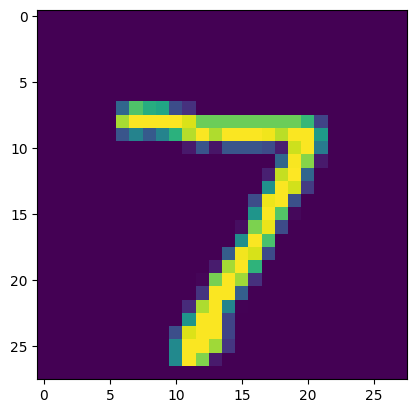

In [8]:
y_pred = model.predict(X_test)

# single specific example
values = y_pred[1]  # contains predictions for each number
pred_v = np.argmax(y_pred[1])  # we take number with max percentage
print(values)
print(pred_v)

print(y_test[1])
plt.imshow(X_test[0].reshape(28, 28))


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


Text(0.5, 1.0, 'Confusion Matrix')

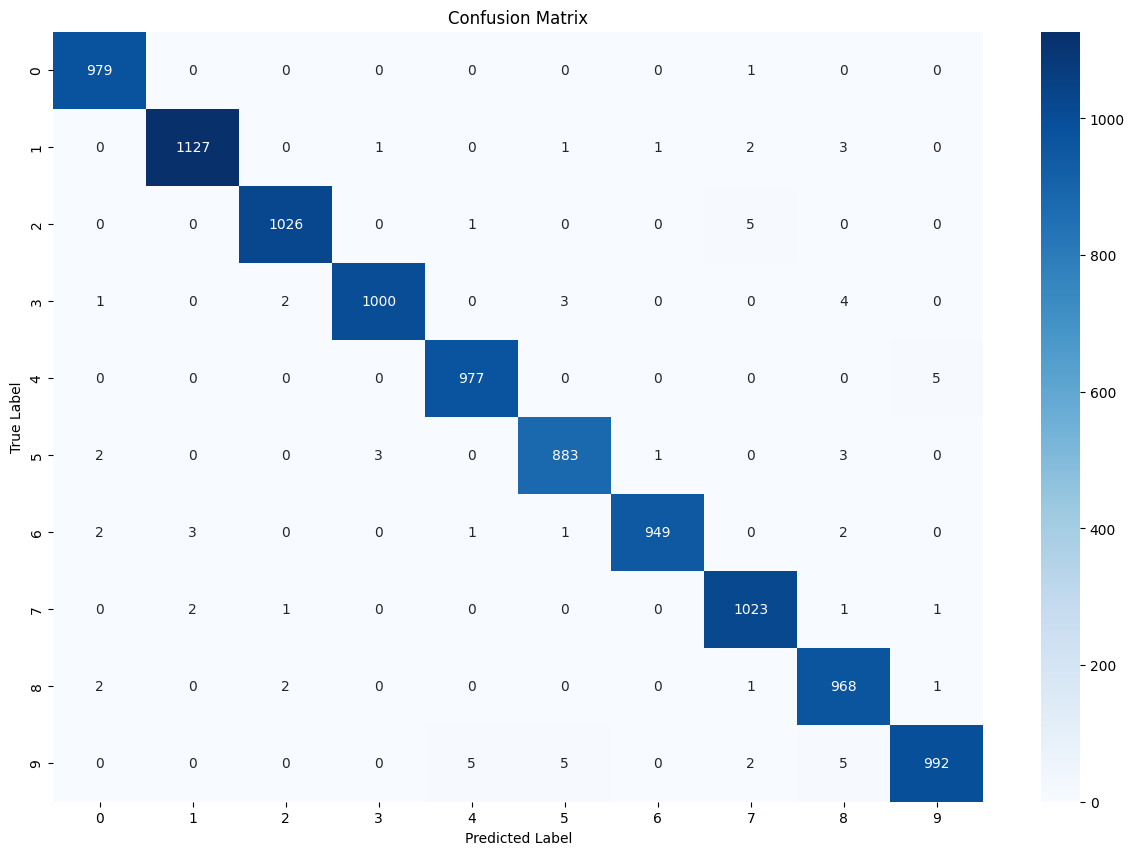

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

conf_mtx = confusion_matrix(y_true, y_pred_classes)

fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(conf_mtx, annot=True, fmt='d', ax=ax, cmap='Blues')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix')
